# Distribuição de probabilidade do custo de desenvolvimento pelo governo -- projetos de software e seus riscos.

## Carregando Pacotes Necessários


In [1]:
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("triangle", quietly = TRUE)) install.packages("triangle")

library(dplyr)
library(ggplot2)
library(triangle)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Valores de acordão segundo site fattocs
  - Dados vindos do: https://www.fattocs.com/blog/qual-o-preco-do-ponto-de-funcao/
  - Fonte oficial: https://pesquisa.apps.tcu.gov.br/documento/acordao-completo/*/NUMACORDAO%253A598%2520ANOACORDAO%253A2018%2520COLEGIADO%253A%2522Plen%25C3%25A1rio%2522/DTRELEVANCIA%2520desc%252C%2520NUMACORDAOINT%2520desc/0

Os dados são de um acordo das empresas dataprev e sepro sobre os valores de contratos de pontos de função estabelecidos entre 2014 e 2017.

In [ ]:
min_preco <- 255.00
max_preco <- 1000.00
mode_preco <- 488.00

cat("Min:", min_preco, "\nMax:", max_preco, "\nMode:", mode_preco, "\n")

Min: 255 
Max: 1000 
Mode: 488 


## Valores especificos

Valores do portal da transparencia:
  - https://portaldatransparencia.gov.br/contratos/consulta?fornecedor=19005408&ordenarPor=dataFimVigencia&direcao=desc
  - https://portaldatransparencia.gov.br/contratos/consulta?fornecedor=13603372&ordenarPor=dataFimVigencia&direcao=desc
  - https://portaldatransparencia.gov.br/contratos/consulta?fornecedor=9705578&ordenarPor=dataFimVigencia&direcao=desc


1. **Análise dos Dados dos Contratos:**
   Os valores dos contratos foram analisados para determinar uma faixa realista de custos por ponto de função. Aqui estão os contratos com os valores unitários:

   - **Contrato 1:**
     - DESENVOLVIMENTO E/OU EVOLUCAO DE SOFTWARE - OUTRAS LINGUAGENS - PLENO: R$ 186.887,90
     - DESENVOLVIMENTO E/OU EVOLUCAO DE SOFTWARE - OUTRAS LINGUAGENS - CIENTISTA DE DADOS: R$ 393.745,98

   Com base nesses valores, identifiquei os valores mínimos e máximos para o custo por ponto de função.

2. **Definindo os Parâmetros:**
   - **Preço Mínimo (min_preco)**: Escolhi o valor mais baixo dos contratos analisados, que é R\$ 186.887,90, para representar o custo mínimo por ponto de função.
   - **Preço Máximo (max_preco)**: Escolhi o valor mais alto dos contratos analisados, que é R\$ 393.745,98, para representar o custo máximo por ponto de função.
   - **Preço Modal (mode_preco)**: Este valor deveria estar entre o preço mínimo e máximo, representando o valor mais provável ou mais frequente. Eu escolhi R\$ 290.000,00 como um valor intermediário, baseado em uma estimativa realista dos dados fornecidos.

### Parâmetros Corrigidos:

- **Preço Mínimo (min_preco)**: R\$ 186.887,90
- **Preço Máximo (max_preco)**: R\$ 393.745,98
- **Preço Modal (mode_preco)**: R\$ 290.000,00



In [ ]:
min_preco <- 186887.90
max_preco <- 393745.98
mode_preco <- 290000.00

cat("Min:", min_preco, "\nMax:", max_preco, "\nMode:", mode_preco, "\n")

Min: 186887.9 
Max: 393746 
Mode: 290000 


## Valores Totais

Soma dos valores finais de cada contrato. Vamos calcular:

1. Contrato da Sigma Dataserv Informática S.A. (Contrato 00004/2020):
   - Valor final: R$ 2.981.772,80

2. Contrato da Sigma Dataserv Informática S.A. (Contrato 00061/2021):
   - Valor final: R$ 3.705.000,00

3. Contrato da Sigma Dataserv Informática S.A. (Contrato 6/2016):
   - Valor atualizado: R$ 32.467.808,70

4. Contrato sem número específico:
   - Valor final: R$ 10.301.556,75

5. Contrato da Basis Tecnologia da Informação S.A. (Contrato 00031/2023):
   - Valor final: R$ 11.335.267,92

6. Contrato da Basis Tecnologia da Informação S.A. (Contrato 00030/2020):
   - Valor final: R$ 4.193.585,76

7. Contrato da Sigma Dataserv Informática S.A. (Contrato 00035/2020):
   - Valor final: R$ 22.809.600,00

Vamos somar esses valores:


In [2]:
valores_totais <- c(2981772.80, 3705000.00, 32467808.70, 10301556.75, 11335267.92, 4193585.76, 22809600.00)
total_contratos <- sum(valores_totais)
total_contratos

[1] 87794592

In [16]:
min_preco <- min(valores_totais)
max_preco <- max(valores_totais)
mode <- function(valores_totais) {
  valor <- unique(valores_totais)
  valor[which.max(tabulate(match(valores_totais, valor)))]
}

mode_preco <- mode(valores_totais)
mode_preco_manual <- 290000.00  # Valor de moda estimado

cat("Min:", min_preco, "\nMax:", max_preco, "\nMode:", mode_preco, "\n")

Min: 2981773 
Max: 32467809 
Mode: 2981773 


## Funções de Distribuição Triangular e Simulação de Monte Carlo

In [17]:
calcular_custo_mc <- function(num_pontos_funcao, min_preco, mode_preco, max_preco, experiencia_equipe, complexidade_tecnica, n_simulacoes) {
  custos_simulacao <- numeric(n_simulacoes)
  for (i in 1:n_simulacoes) {
    preco_ponto_funcao <- rtriangle(1, min_preco, max_preco, mode_preco)
    fator_complexidade <- experiencia_equipe * complexidade_tecnica
    custos_simulacao[i] <- num_pontos_funcao * preco_ponto_funcao * fator_complexidade
  }
  return(custos_simulacao)
}

## Simulação de Monte Carlo

In [18]:
# Definindo as variáveis para simulação
num_pontos_funcao <- 500
experiencia_equipe <- 1.1  # Exemplo de uma equipe com experiência moderada
complexidade_tecnica <- 1.2  # Exemplo de alta complexidade técnica
n_simulacoes <- 10000  # Número de simulações

# Simulação dos custos utilizando Monte Carlo
set.seed(123)  # Para reprodutibilidade
custos_mc <- calcular_custo_mc(num_pontos_funcao, min_preco, mode_preco, max_preco, experiencia_equipe, complexidade_tecnica, n_simulacoes)

## Verificação e Visualização dos Resultados

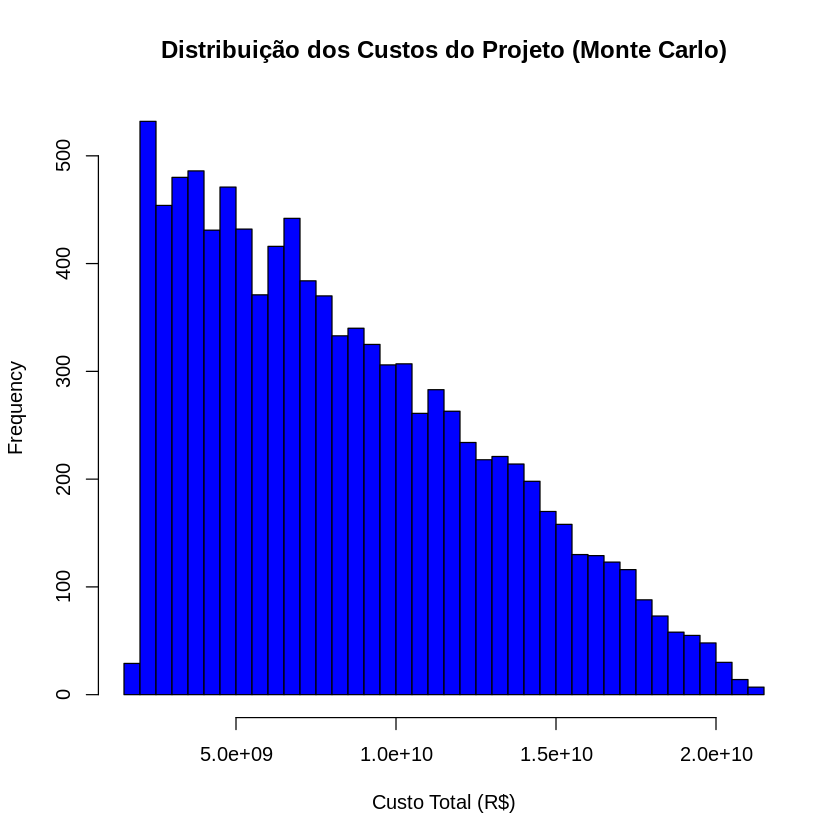

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.969e+09 4.608e+09 7.593e+09 8.402e+09 1.157e+10 2.128e+10 

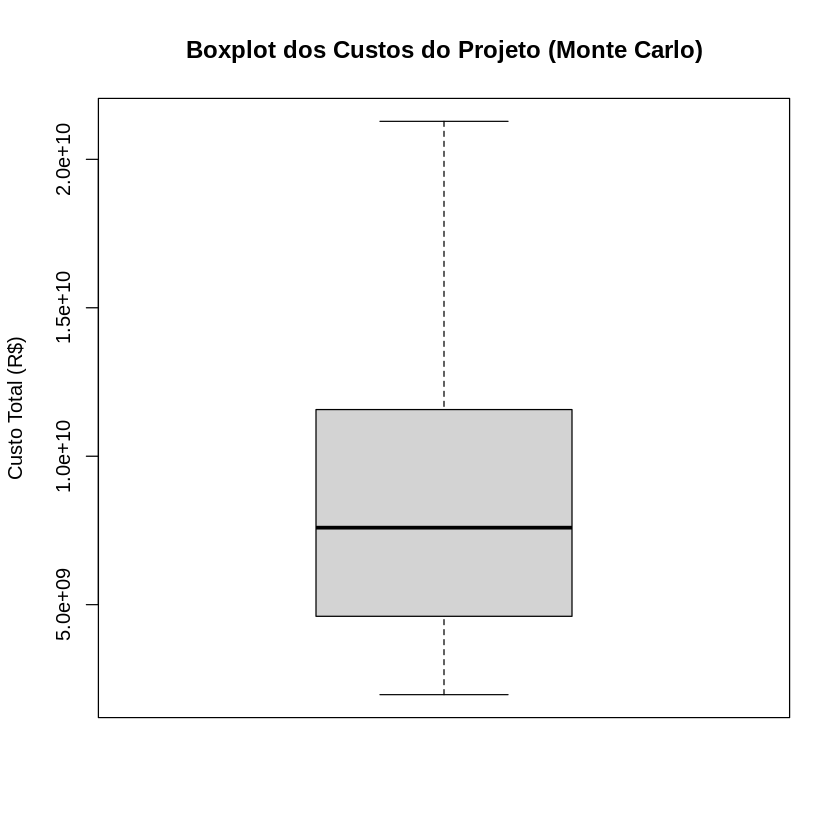

In [19]:
# Gráfico: Histograma dos custos
hist(custos_mc, breaks = 50, main = "Distribuição dos Custos do Projeto (Monte Carlo)", xlab = "Custo Total (R$)", col = "blue", border = "black")

# Gráfico: Boxplot dos custos
boxplot(custos_mc, main = "Boxplot dos Custos do Projeto (Monte Carlo)", ylab = "Custo Total (R$)")

# Estatísticas descritivas
summary(custos_mc)

## Estimativa de Risco

In [20]:
# Valores totais finais dos contratos
valores_totais <- c(2981772.80, 3705000.00, 32467808.70, 10301556.75, 11335267.92, 4193585.76, 22809600.00)

# Escolher o percentil para o limite superior (exemplo: 95%)
limite_superior <- quantile(valores_totais, 0.95)

# Simulação hipotética de custos
set.seed(123)  # Definir semente para reproducibilidade
custos_mc <- rnorm(10000, mean(valores_totais), sd(valores_totais))

# Calcular a probabilidade de ultrapassar o limite superior
probabilidade_ultrapassar <- mean(custos_mc > limite_superior)
cat("Limite Superior:", limite_superior, "\n")
cat("Probabilidade de ultrapassar", limite_superior, ": ", probabilidade_ultrapassar * 100, "%\n")

Limite Superior: 29570346 
Probabilidade de ultrapassar 29570346 :  6.24 %


In [21]:
# Definir um limite superior de custo
limite_superior <- 29570346

# Calcular a probabilidade de ultrapassar o limite superior
probabilidade_ultrapassar <- mean(custos_mc > limite_superior)
cat("Probabilidade de ultrapassar", limite_superior, ": ", probabilidade_ultrapassar * 100, "%\n")

Probabilidade de ultrapassar 29570346 :  6.24 %


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-30396093   5083311  12418258  12515601  20060914  55507593 

A probabilidade de ultrapassar o limite superior de 29570346 é de 6.24 %


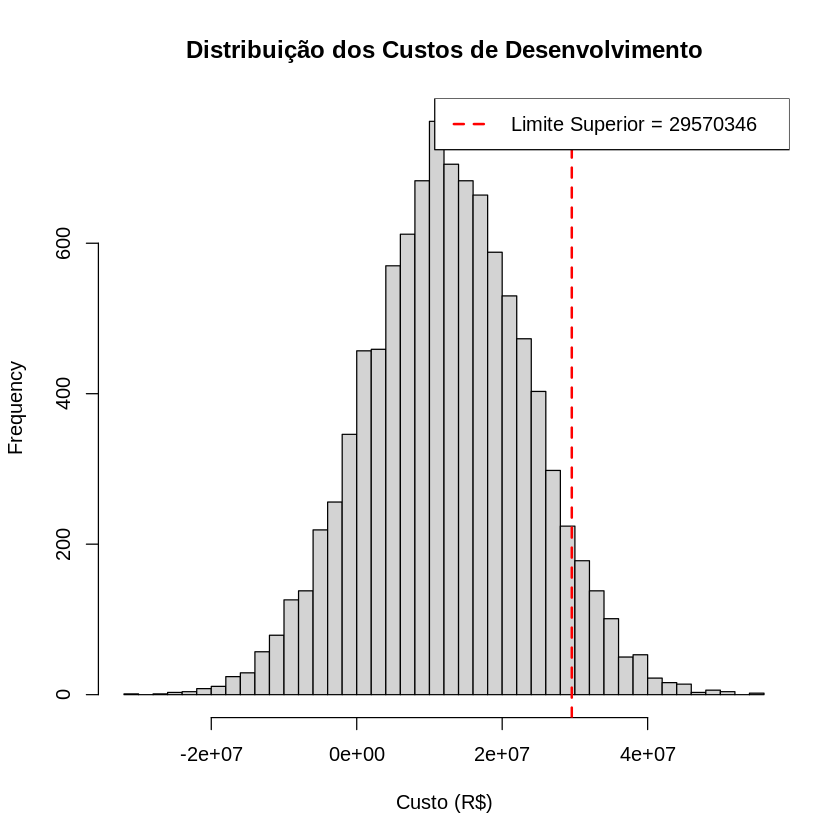

In [22]:
summary(custos_mc)
hist(custos_mc, breaks=50, main="Distribuição dos Custos de Desenvolvimento", xlab="Custo (R$)")
abline(v = limite_superior, col = "red", lwd = 2, lty = 2)
legend("topright", legend = paste("Limite Superior =", limite_superior), col = "red", lwd = 2, lty = 2)

# Mostrar a probabilidade
cat("A probabilidade de ultrapassar o limite superior de", limite_superior, "é de", probabilidade_ultrapassar * 100, "%\n")

## Intervalo de Confiança


In [23]:
# Calcular o intervalo de confiança para os custos do projeto (95%)
intervalo_confiança <- quantile(custos_mc, probs = c(0.025, 0.975))
cat("Intervalo de confiança (95%):\n")
print(intervalo_confiança)

Intervalo de confiança (95%):
    2.5%    97.5% 
-9536812 34329095 


## Análise de Sensibilidade

## Experiência da Equipe
  - 1.0: Representa uma equipe com experiência de referência (base).
  - 1.1: Representa uma equipe com 10% mais experiência que a base.
  - 1.2: Representa uma equipe com 20% mais experiência que a base.
  - 1.3: Representa uma equipe com 30% mais experiência que a base.
  - 1.4: Representa uma equipe com 40% mais experiência que a base.

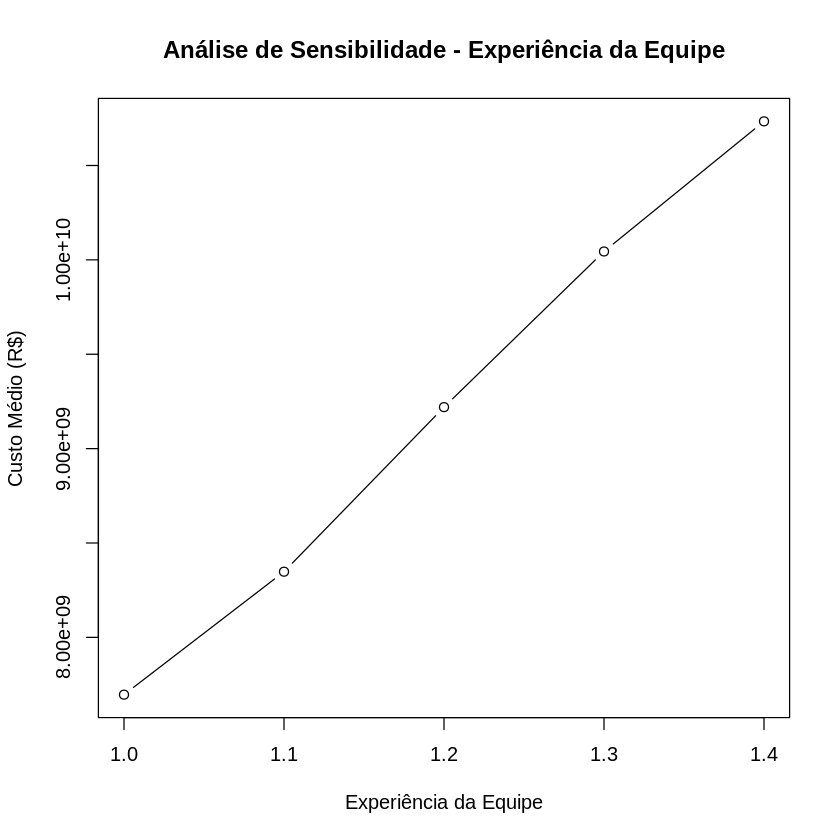

In [24]:
# Sensibilidade para experiência da equipe
experiencia_variacoes <- c(1.0, 1.1, 1.2, 1.3, 1.4)
sensibilidade_experiencia <- sapply(experiencia_variacoes, function(exp) {
  calcular_custo_mc(num_pontos_funcao, min_preco, mode_preco, max_preco, exp, complexidade_tecnica, n_simulacoes)
})
mean_custos_experiencia <- colMeans(sensibilidade_experiencia)
plot(experiencia_variacoes, mean_custos_experiencia, type = "b", xlab = "Experiência da Equipe", ylab = "Custo Médio (R$)", main = "Análise de Sensibilidade - Experiência da Equipe")


## Complexidade Técnica
  - 1.0: Complexidade técnica de referência (base).
  - 1.1: Complexidade técnica 10% maior que a base.
  - 1.2: Complexidade técnica 20% maior que a base.
  - 1.3: Complexidade técnica 30% maior que a base.
  - 1.4: Complexidade técnica 40% maior que a base.

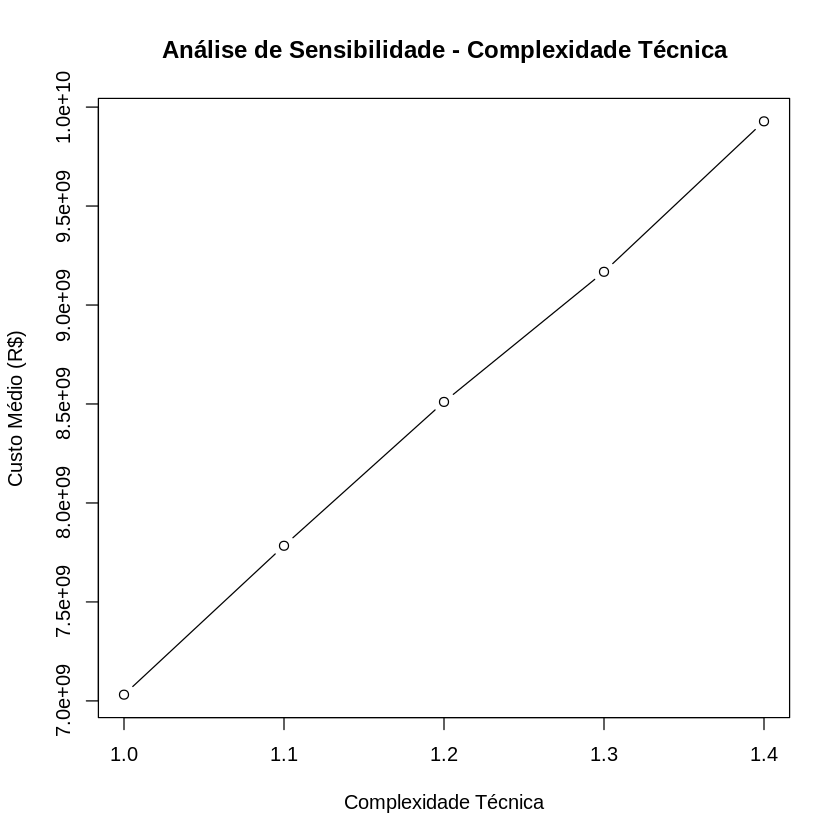

In [25]:
# Sensibilidade para complexidade técnica
complexidade_variacoes <- c(1.0, 1.1, 1.2, 1.3, 1.4)
sensibilidade_complexidade <- sapply(complexidade_variacoes, function(comp) {
  calcular_custo_mc(num_pontos_funcao, min_preco, mode_preco, max_preco, experiencia_equipe, comp, n_simulacoes)
})
mean_custos_complexidade <- colMeans(sensibilidade_complexidade)
plot(complexidade_variacoes, mean_custos_complexidade, type = "b", xlab = "Complexidade Técnica", ylab = "Custo Médio (R$)", main = "Análise de Sensibilidade - Complexidade Técnica")


## Análise por Tipo de Desenvolvimento


## Definindo os Dados
  - Dados de diferentes tipos de desenvolvimento

In [26]:
dados_projetos <- data.frame(
  Especificacao = c(
    "Desenvolvedor JAVA", "Desenvolvedor PHP", "Desenvolvedor Python", "Desenvolvedor Mobile", "Desenvolvedor Outras linguagens",
    "Desenvolvimento manutenção de sistema legado", "Desenvolvedor JAVA para correções e novos modulos",
    "Desenvolvedor PHP para correções e novos modulos", "Desenvolvedor Python para correções e novos modulos",
    "Desenvolvedor Mobile para correções e novos modulos", "Desenvolvedor Outras lingugens para correções e novos modulos"
  ),
  Unidade = "Ponto de Função",
  Quantidade = c(
    16429, 5546, 150, 2747, 58, 1796, 4933, 5541, 343, 1868, 511
  ),
  Valor_Unitario = c(
    565.15, 565.15, 565.15, 565.15, 565.15, 680.00, 527.00, 527.00, 527.00, 527.00, 527.00
  )
)

print(dados_projetos)

                                                   Especificacao
1                                             Desenvolvedor JAVA
2                                              Desenvolvedor PHP
3                                           Desenvolvedor Python
4                                           Desenvolvedor Mobile
5                                Desenvolvedor Outras linguagens
6                   Desenvolvimento manutenção de sistema legado
7              Desenvolvedor JAVA para correções e novos modulos
8               Desenvolvedor PHP para correções e novos modulos
9            Desenvolvedor Python para correções e novos modulos
10           Desenvolvedor Mobile para correções e novos modulos
11 Desenvolvedor Outras lingugens para correções e novos modulos
           Unidade Quantidade Valor_Unitario
1  Ponto de Função      16429         565.15
2  Ponto de Função       5546         565.15
3  Ponto de Função        150         565.15
4  Ponto de Função       2747         56

## Simulação para Cada Tipo de Desenvolvimento

In [27]:
simular_por_tipo <- function(dados_projetos, n_simulacoes, min_preco, mode_preco, max_preco, experiencia_equipe, complexidade_tecnica) {
  resultados <- list()
  for (i in seq_len(nrow(dados_projetos))) {
    num_pontos_funcao <- dados_projetos$Quantidade[i]
    custos <- calcular_custo_mc(num_pontos_funcao, min_preco, mode_preco, max_preco, experiencia_equipe, complexidade_tecnica, n_simulacoes)
    resultados[[dados_projetos$Especificacao[i]]] <- custos
  }
  return(resultados)
}

resultados_simulacao <- simular_por_tipo(dados_projetos, n_simulacoes, min_preco, mode_preco, max_preco, experiencia_equipe, complexidade_tecnica)

# Verificar dados de uma das simulações
print(resultados_simulacao[["Desenvolvedor JAVA"]])

    [1] 188137959961 152285919065 256912588404  99907531826 205192853590
    [6]  94861761759 236596260748 176824931252 623553517395 249512604966
   [11] 135412651278  83621900628 115305086678 297594510459 594252078485
   [16] 321417677778 427828553877 148925467239 339373434400 401700531215
   [21] 218113043849  92624740455 192275224681 289479684610 105907564584
   [26] 225359498516 309229194407 296720009950 431885065739 257517429563
   [31] 631100852738 510358810465 445460666218 218918140271 245103802883
   [36] 593024680338 107917986721 502141835565 165817219896 103749811077
   [41] 167924433168 475389439008 378708542109 315766432594 262698746301
   [46] 597962512956 122217899366 430661978494 504628006950 547519097838
   [51] 359545448105  64756694340  68948545173 194623152807 240744174725
   [56] 212863746106 406533198047 568961844191 477610352655 105591151215
   [61]  96563975638 179877824332 289099200500 426983208500 196892695354
   [66] 331361955718 270537286796 179842401075 4204

## Visualização dos Resultados
  - Gráfico: Histograma dos custos por tipo de desenvolvimento

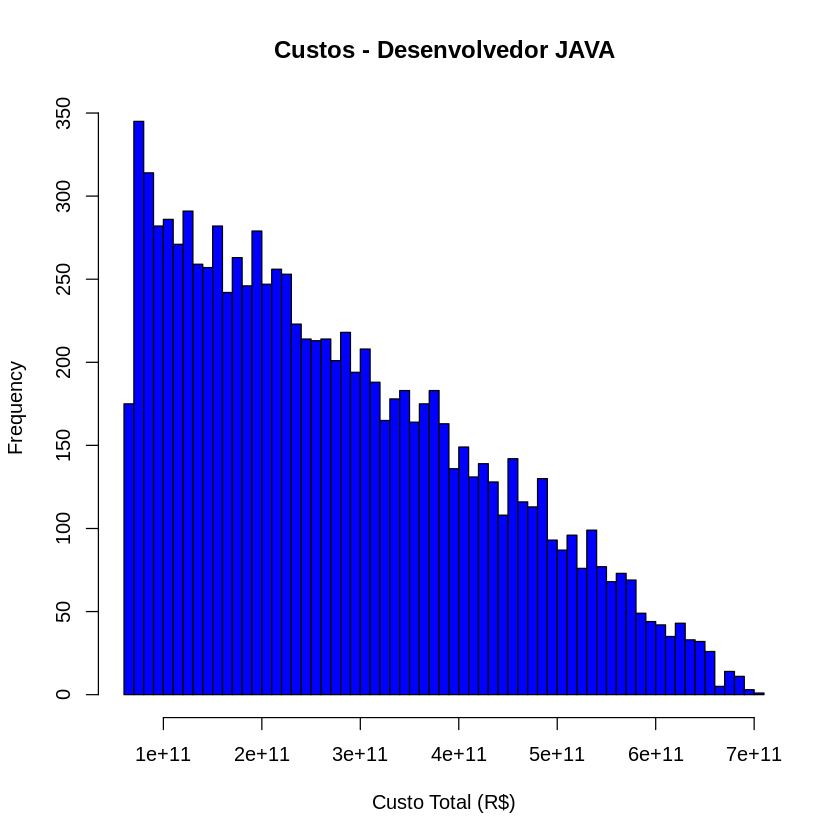

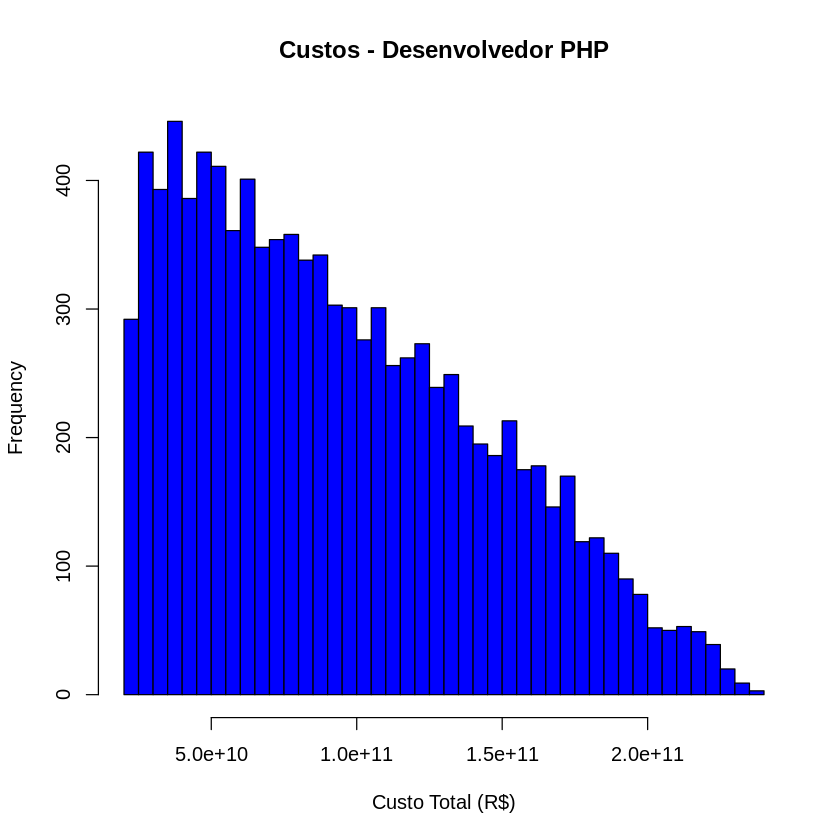

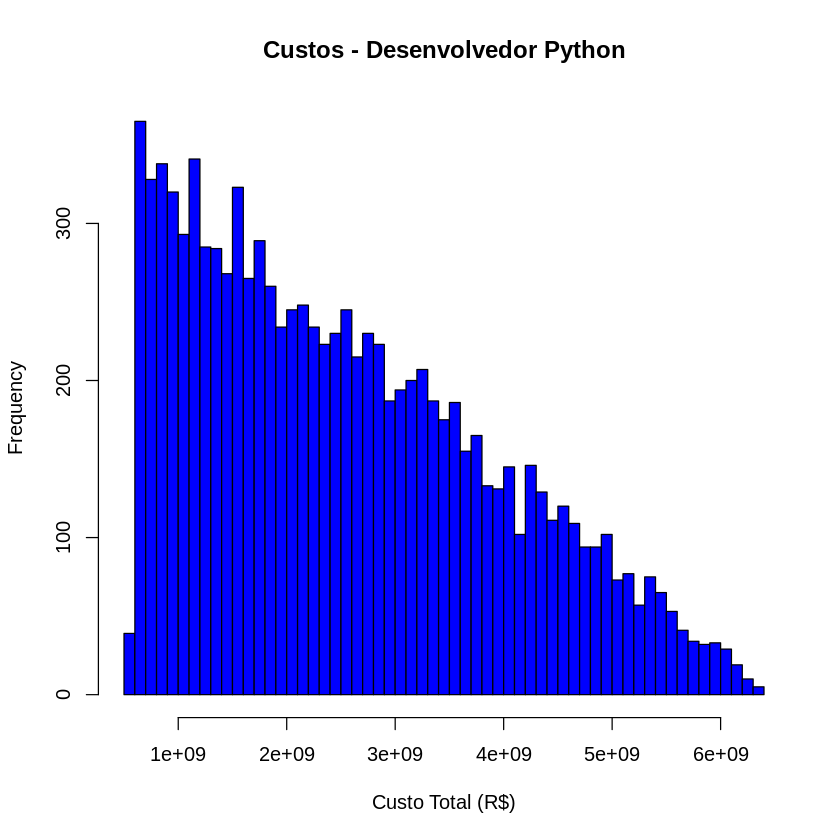

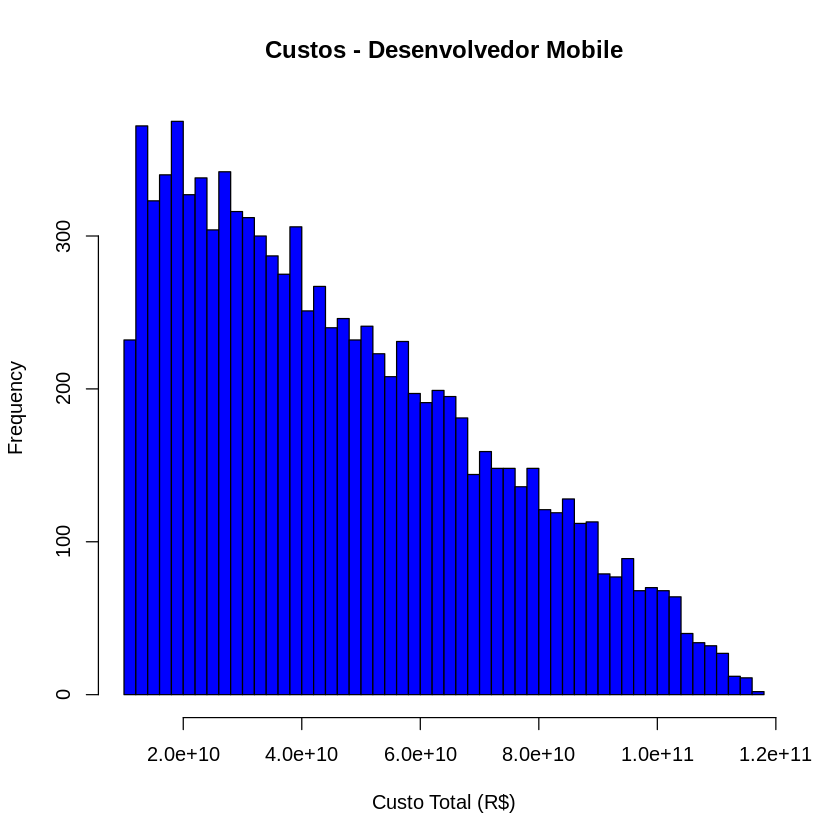

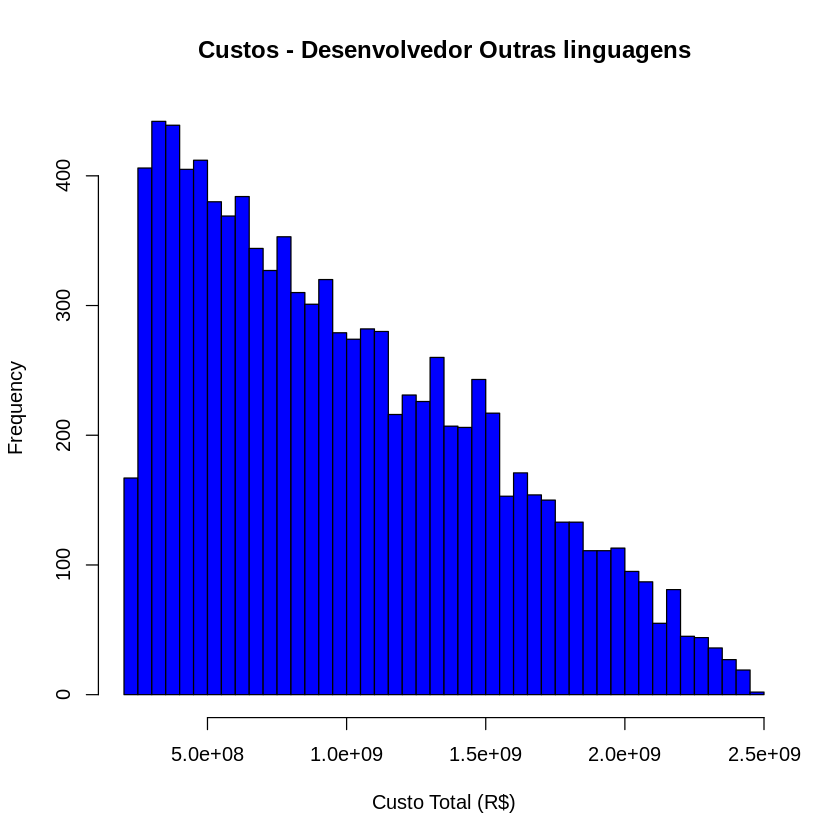

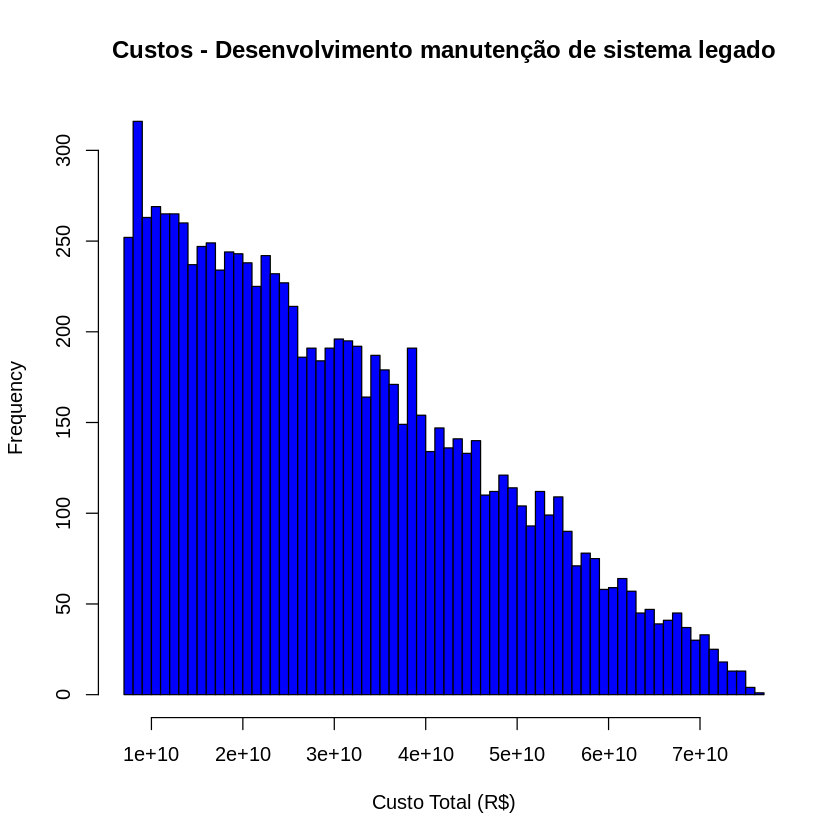

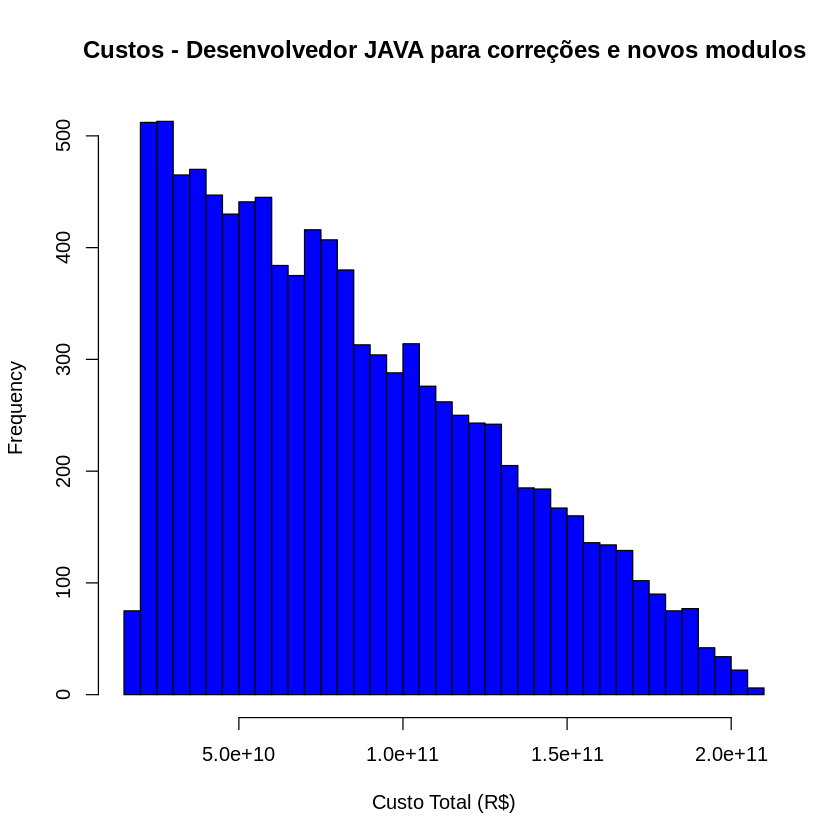

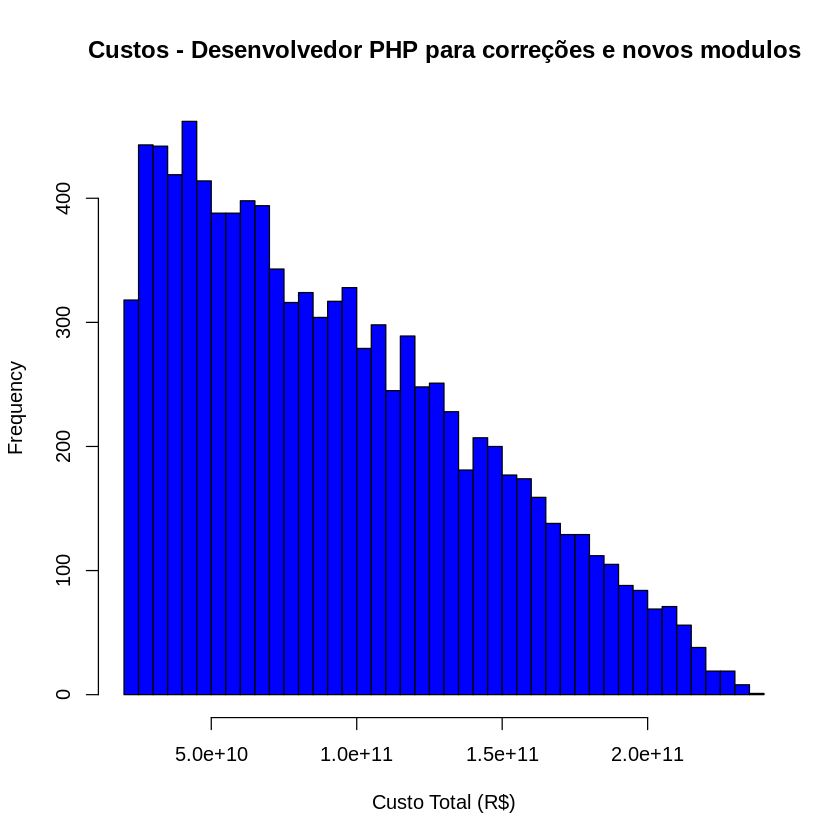

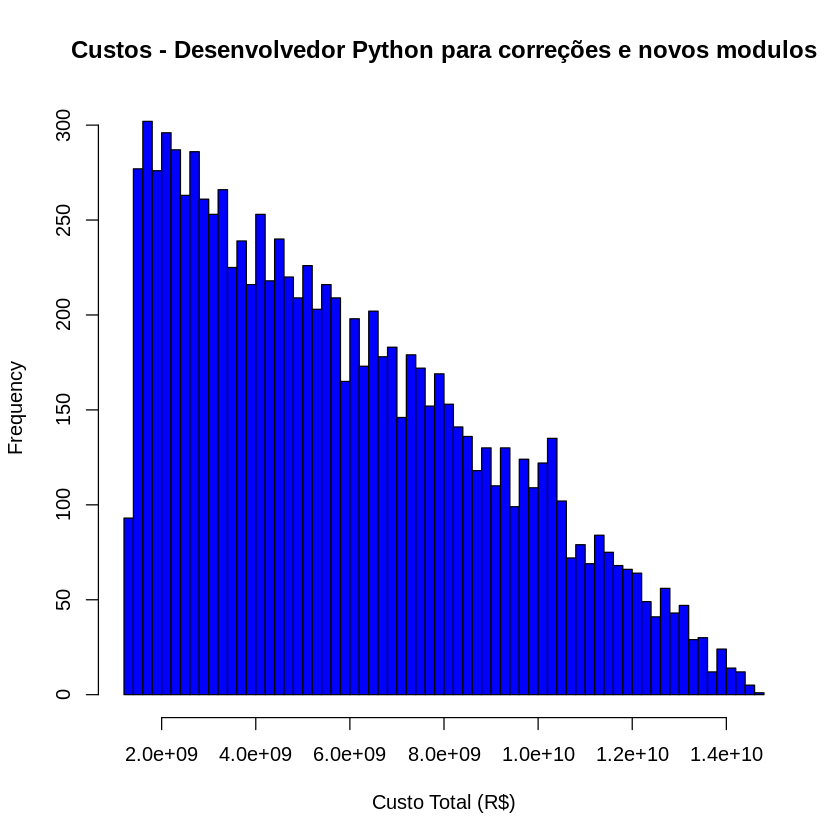

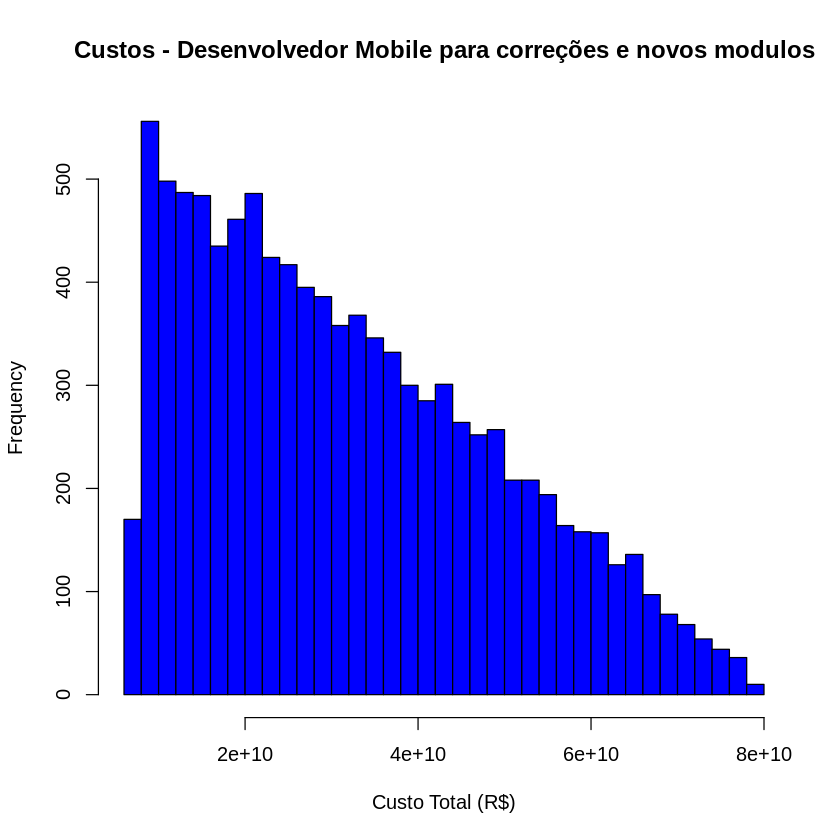

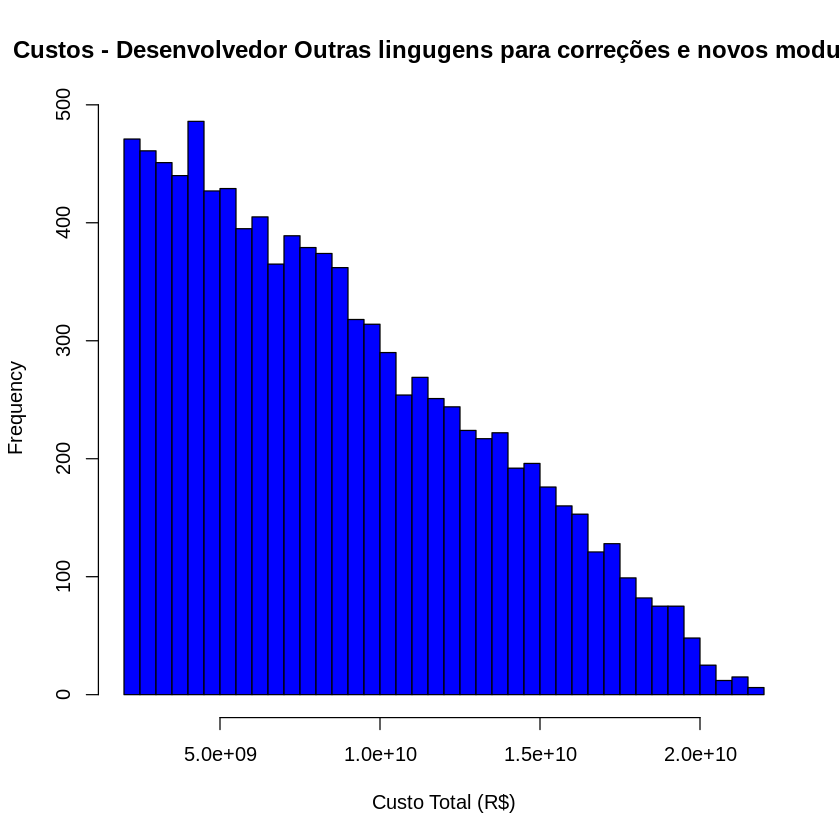

In [28]:
for (tipo in names(resultados_simulacao)) {
  hist(resultados_simulacao[[tipo]], breaks = 50, main = paste("Custos -", tipo), xlab = "Custo Total (R$)", col = "blue", border = "black")
}

## Estatísticas Descritivas por Tipo de Desenvolvimento
  - Calcular e exibir estatísticas descritivas para cada tipo de desenvolvimento

In [29]:
estatisticas <- data.frame(
  Especificacao = character(),
  Media = numeric(),
  Mediana = numeric(),
  Desvio_Padrao = numeric(),
  Intervalo_Confiança = character(),
  stringsAsFactors = FALSE
)

for (tipo in names(resultados_simulacao)) {
  custos <- resultados_simulacao[[tipo]]
  media <- mean(custos)
  mediana <- median(custos)
  desvio_padrao <- sd(custos)
  intervalo_confianca <- quantile(custos, probs = c(0.025, 0.975))

  estatisticas <- rbind(estatisticas, data.frame(
    Especificacao = tipo,
    Media = media,
    Mediana = mediana,
    Desvio_Padrao = desvio_padrao,
    Intervalo_Confiança = paste0("(", intervalo_confianca[1], ", ", intervalo_confianca[2], ")")
  ))
}

print(estatisticas)


                                                   Especificacao        Media
1                                             Desenvolvedor JAVA 276549414499
2                                              Desenvolvedor PHP  94289651518
3                                           Desenvolvedor Python   2542300049
4                                           Desenvolvedor Mobile  46503998353
5                                Desenvolvedor Outras linguagens    987022426
6                   Desenvolvimento manutenção de sistema legado  30282374714
7              Desenvolvedor JAVA para correções e novos modulos  83019695412
8               Desenvolvedor PHP para correções e novos modulos  92704042528
9            Desenvolvedor Python para correções e novos modulos   5829427322
10           Desenvolvedor Mobile para correções e novos modulos  31883754479
11 Desenvolvedor Outras lingugens para correções e novos modulos   8631344737
        Mediana Desvio_Padrao                  Intervalo_Confian

## Estimativa de Risco por Tipo de Desenvolvimento

In [32]:
# Definir um limite superior de custo para cada tipo de desenvolvimento
limite_superior <- 2500000000 #2.500.000.000

# Calcular a probabilidade de ultrapassar o limite superior para cada tipo de desenvolvimento
probabilidades <- data.frame(
  Especificacao = character(),
  Probabilidade = numeric(),
  stringsAsFactors = FALSE
)

for (tipo in names(resultados_simulacao)) {
  custos <- resultados_simulacao[[tipo]]
  probabilidade_ultrapassar <- mean(custos > limite_superior)

  probabilidades <- rbind(probabilidades, data.frame(
    Especificacao = tipo,
    Probabilidade = probabilidade_ultrapassar * 100
  ))
}

print(probabilidades)


                                                   Especificacao Probabilidade
1                                             Desenvolvedor JAVA        100.00
2                                              Desenvolvedor PHP        100.00
3                                           Desenvolvedor Python         45.88
4                                           Desenvolvedor Mobile        100.00
5                                Desenvolvedor Outras linguagens          0.00
6                   Desenvolvimento manutenção de sistema legado        100.00
7              Desenvolvedor JAVA para correções e novos modulos        100.00
8               Desenvolvedor PHP para correções e novos modulos        100.00
9            Desenvolvedor Python para correções e novos modulos         83.42
10           Desenvolvedor Mobile para correções e novos modulos        100.00
11 Desenvolvedor Outras lingugens para correções e novos modulos         95.29


## Estimativas de custos detalhados por tipo de desenvolvimento


In [33]:
estimativas_custos <- data.frame(
  Especificacao = c("Desenvolvedor JAVA", "Desenvolvedor PHP", "Desenvolvedor Python",
                    "Desenvolvedor Mobile", "Desenvolvedor Outras linguagens",
                    "Desenvolvimento manutenção de sistema legado",
                    "Desenvolvedor JAVA para correções e novos modulos",
                    "Desenvolvedor PHP para correções e novos modulos",
                    "Desenvolvedor Python para correções e novos modulos",
                    "Desenvolvedor Mobile para correções e novos modulos",
                    "Desenvolvedor Outras lingugens para correções e novos modulos"),
  Custo_Minimo = c(430, 430, 430, 430, 430, 430, 430, 430, 430, 430, 430),
  Custo_Maximo = c(886.51, 886.51, 886.51, 886.51, 886.51, 886.51, 886.51, 886.51, 886.51, 886.51, 886.51),
  Custo_Modal = c(565.15, 565.15, 565.15, 565.15, 565.15, 565.15, 527, 527, 527, 527, 527)
)

# Função para simular os custos usando distribuição triangular
simular_custos <- function(min, max, mode, n) {
  rtriangle(n, min, max, mode)
}

# Aplicar a simulação de Monte Carlo para cada tipo de desenvolvimento
n_simulacoes <- 10000
resultados_simulacao <- lapply(1:nrow(estimativas_custos), function(i) {
  simular_custos(
    estimativas_custos$Custo_Minimo[i],
    estimativas_custos$Custo_Maximo[i],
    estimativas_custos$Custo_Modal[i],
    n_simulacoes
  )
})

names(resultados_simulacao) <- estimativas_custos$Especificacao

## visualização dos resultados para cada tipo de desenvolvimento

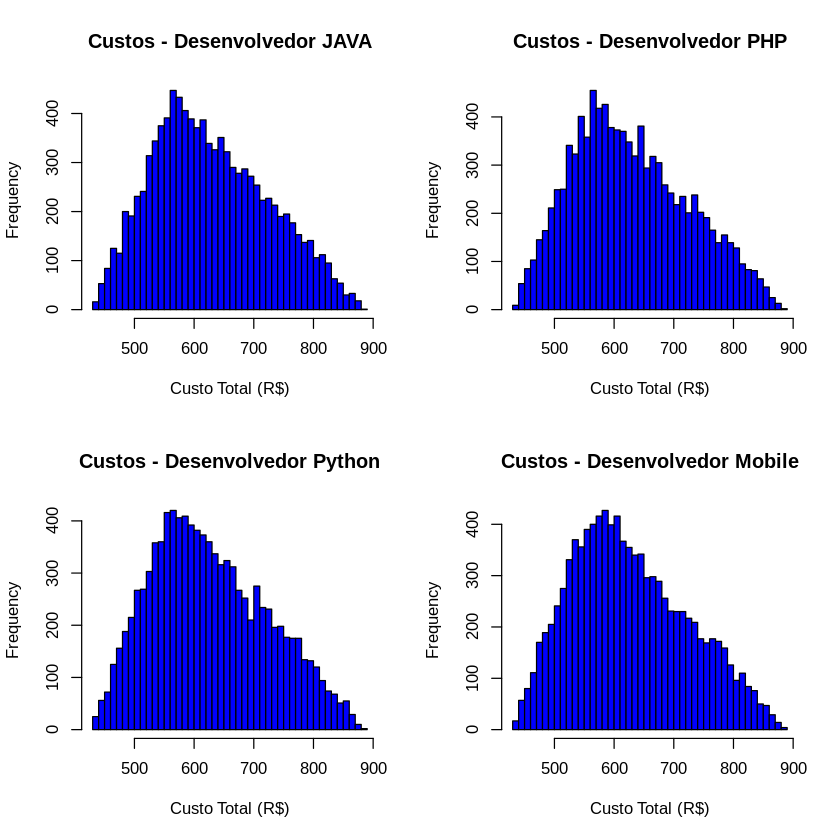

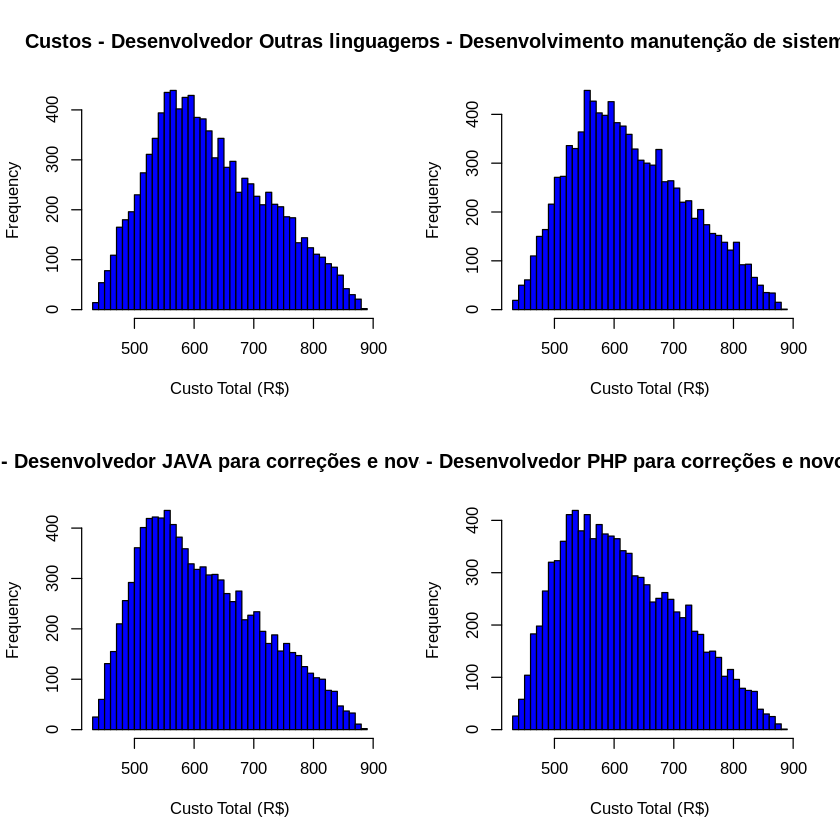

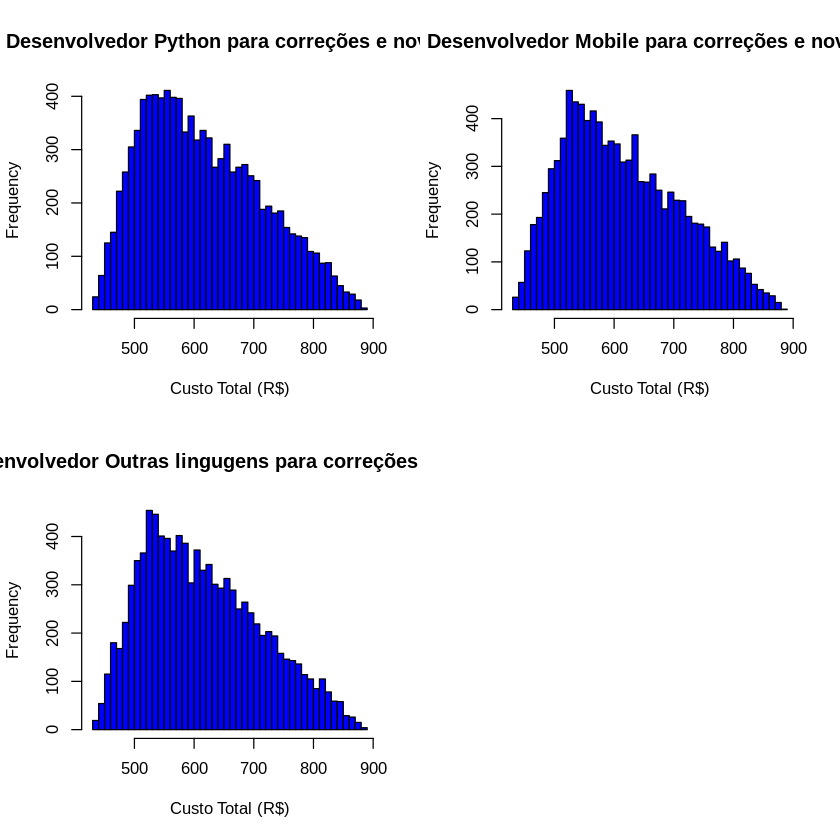

In [34]:
par(mfrow = c(2, 2))  # Organizar gráficos em uma grade de 2x2

for (tipo in names(resultados_simulacao)) {
  hist(resultados_simulacao[[tipo]], breaks = 50, main = paste("Custos -", tipo), xlab = "Custo Total (R$)", col = "blue", border = "black")
}


## Calcular e exibir estatísticas descritivas para cada tipo de desenvolvimento

In [35]:
estatisticas <- data.frame(
  Especificacao = character(),
  Media = numeric(),
  Mediana = numeric(),
  Desvio_Padrao = numeric(),
  Intervalo_Confiança = character(),
  stringsAsFactors = FALSE
)

for (tipo in names(resultados_simulacao)) {
  custos <- resultados_simulacao[[tipo]]
  media <- mean(custos)
  mediana <- median(custos)
  desvio_padrao <- sd(custos)
  intervalo_confianca <- quantile(custos, probs = c(0.025, 0.975))

  estatisticas <- rbind(estatisticas, data.frame(
    Especificacao = tipo,
    Media = media,
    Mediana = mediana,
    Desvio_Padrao = desvio_padrao,
    Intervalo_Confiança = paste0("(", intervalo_confianca[1], ", ", intervalo_confianca[2], ")")
  ))
}

print(estatisticas)


                                                   Especificacao    Media
1                                             Desenvolvedor JAVA 628.5701
2                                              Desenvolvedor PHP 628.6332
3                                           Desenvolvedor Python 626.4501
4                                           Desenvolvedor Mobile 626.5098
5                                Desenvolvedor Outras linguagens 627.4582
6                   Desenvolvimento manutenção de sistema legado 626.7419
7              Desenvolvedor JAVA para correções e novos modulos 614.0075
8               Desenvolvedor PHP para correções e novos modulos 614.4706
9            Desenvolvedor Python para correções e novos modulos 615.2799
10           Desenvolvedor Mobile para correções e novos modulos 614.0830
11 Desenvolvedor Outras lingugens para correções e novos modulos 614.7890
    Mediana Desvio_Padrao                  Intervalo_Confiança
1  617.2200      95.97551  (467.47600849993, 824.

 definir os dados das atas de registro de preços e os parâmetros de simulação:
  - Fonte: https://pncp.gov.br/app/atas?q=pontos%20de%20função&status=vigente&pagina=1
  Ata 29 a 33

In [36]:
atas <- data.frame(
  especificacao = c(
    "Desenvolvedor JAVA", "Desenvolvedor PHP", "Desenvolvedor Python", "Desenvolvedor Mobile",
    "Desenvolvedor Outras linguagens", "Desenvolvimento manutenção de sistema legado",
    "Desenvolvedor JAVA para correções e novos modulos", "Desenvolvedor PHP para correções e novos modulos",
    "Desenvolvedor Python para correções e novos modulos", "Desenvolvedor Mobile para correções e novos modulos",
    "Desenvolvedor Outras linguagens para correções e novos modulos",
    "Desenvolvedor JAVA", "Desenvolvedor PHP", "Desenvolvedor Python", "Desenvolvedor Mobile",
    "Desenvolvedor Outras linguagens", "Desenvolvimento manutenção de sistema legado",
    "Desenvolvedor JAVA para correções e novos modulos", "Desenvolvedor PHP para correções e novos modulos",
    "Desenvolvedor Python para correções e novos modulos", "Desenvolvedor Mobile para correções e novos modulos",
    "Desenvolvedor Outras linguagens para correções e novos modulos",
    "Desenvolvedor JAVA", "Desenvolvedor PHP", "Desenvolvedor Python", "Desenvolvedor Mobile",
    "Desenvolvedor Outras linguagens", "Desenvolvimento manutenção de sistema legado"
  ),
  unidade = "Ponto de Função",
  quantidade = c(16429, 5546, 150, 2747, 58, 1796, 4933, 5541, 343, 1868, 511,
                 5204, 295, 3940, 874, 2542, 4930, 8397, 2604, 901, 1000, 4804,
                 7357, 6043, 200, 730, 184, 1644),
  valor_unitario = c(565.15, 565.15, 565.15, 565.15, 565.15, 565.15, 527.00, 527.00, 527.00, 527.00, 527.00,
                     600.00, 680.00, 680.00, 680.00, 680.00, 680.00, 540.00, 680.00, 680.00, 680.00, 540.00,
                     550.00, 530.00, 840.00, 750.00, 800.00, 720.00)
)

# Parâmetros de simulação
min_valor <- 430
max_valor <- 886.51
mode_valor <- 565.15
num_simulacoes <- 10000


Definindo as funções necessárias para calcular os pontos de função conforme o SISP v2.3 e juntar os dados das atas com as complexidades.

A definição das funções e o processamento dos dados das atas. Vamos juntar os dados das atas com as complexidades e calcular os pontos de função:

Fonte: https://www.gov.br/governodigital/pt-br/estrategias-e-governanca-digital/sisp/documentos/arquivos/roteiro-de-metricas-do-sisp-v2-3.pdf/view

## Funções de cálculo de pontos de função conforme o SISP v2.3

In [37]:
calcular_pontos_funcao <- function(tipo, complexidade) {
  contrib_funcional <- switch(
    tipo,
    "ALI" = switch(
      complexidade,
      "Baixa" = 7,
      "Media" = 10,
      "Alta" = 15
    ),
    "AIE" = switch(
      complexidade,
      "Baixa" = 5,
      "Media" = 7,
      "Alta" = 10
    ),
    "EE" = switch(
      complexidade,
      "Baixa" = 3,
      "Media" = 4,
      "Alta" = 6
    ),
    "CE" = switch(
      complexidade,
      "Baixa" = 3,
      "Media" = 4,
      "Alta" = 6
    ),
    "SE" = switch(
      complexidade,
      "Baixa" = 4,
      "Media" = 5,
      "Alta" = 7
    ),
    stop("Tipo ou complexidade desconhecido")
  )
  return(contrib_funcional)
}


## Dados de complexidade para cada tipo funcional

In [38]:
complexidades <- data.frame(
  especificacao = c(
    "Desenvolvedor JAVA", "Desenvolvedor PHP", "Desenvolvedor Python", "Desenvolvedor Mobile",
    "Desenvolvedor Outras linguagens", "Desenvolvimento manutenção de sistema legado",
    "Desenvolvedor JAVA para correções e novos modulos", "Desenvolvedor PHP para correções e novos modulos",
    "Desenvolvedor Python para correções e novos modulos", "Desenvolvedor Mobile para correções e novos modulos",
    "Desenvolvedor Outras linguagens para correções e novos modulos"
  ),
  tipo_funcional = c(
    "ALI", "AIE", "EE", "CE", "SE", "ALI", "ALI", "AIE", "EE", "CE", "SE"
  ),
  complexidade = c(
    "Alta", "Media", "Baixa", "Media", "Alta", "Baixa", "Media", "Alta", "Baixa", "Media", "Alta"
  )
)

## Juntando os dados das atas com as complexidades

In [39]:
atas <- atas %>%
  left_join(complexidades, by = "especificacao") %>%
  rowwise() %>%
  mutate(pontos_funcao = calcular_pontos_funcao(tipo_funcional, complexidade) * quantidade)
if (any(is.na(atas$pontos_funcao))) {
  stop("Existem valores NaN nos pontos de função calculados.")
}

## Depuração: Imprimir cabeçalho dos valores de pontos de função

In [40]:
print(head(atas$pontos_funcao))

[1] 246435  38822    450  10988    406  12572


Vamos continuar com a próxima etapa, onde faremos a simulação de Monte Carlo para calcular os custos totais dos projetos.

Agora vamos prosseguir com a simulação de Monte Carlo para calcular os custos totais dos projetos. Vamos usar a distribuição triangular para simular os custos por ponto de função e calcular os custos totais para cada simulação. Em seguida, verificaremos se os resultados são válidos e visualizaremos a distribuição dos custos totais simulados. Vamos avançar:

Vamos continuar com a simulação de Monte Carlo para calcular os custos totais dos projetos. Primeiro, vamos definir a função para a distribuição triangular e, em seguida, realizar as simulações. Vamos lá:

## Para caso de erro no rtringle(Caso funcione, não executar!)

In [46]:
rtriangle <- function(n, min, mode, max) {
  u <- runif(n)
  left <- (mode - min) / (max - min)
  right <- (max - mode) / (max - min)
  result <- ifelse(u <= left, min + sqrt(u * (max - min) * (mode - min)), mode - sqrt((1 - u) * (max - min) * (max - mode)))
  return(result)
}

## Simulação de Monte Carlo para custo total dos projetos

In [49]:
custos_totais <- replicate(num_simulacoes, {
  custos_por_ponto <- rtriangle(nrow(atas), min_valor, mode_valor, max_valor)
  sum(custos_por_ponto * atas$pontos_funcao)
})

## Remover valores NA, se houver

In [50]:
custos_totais_validos <- custos_totais[!is.na(custos_totais)]

## Verificar se os custos totais têm valores válidos (Teste, apenas em caso de erro)

In [51]:
if (length(custos_totais_validos) == 0) {
  stop("Os custos totais contêm apenas valores NaN.")
}

## Visualizar a distribuição dos custos totais simulados

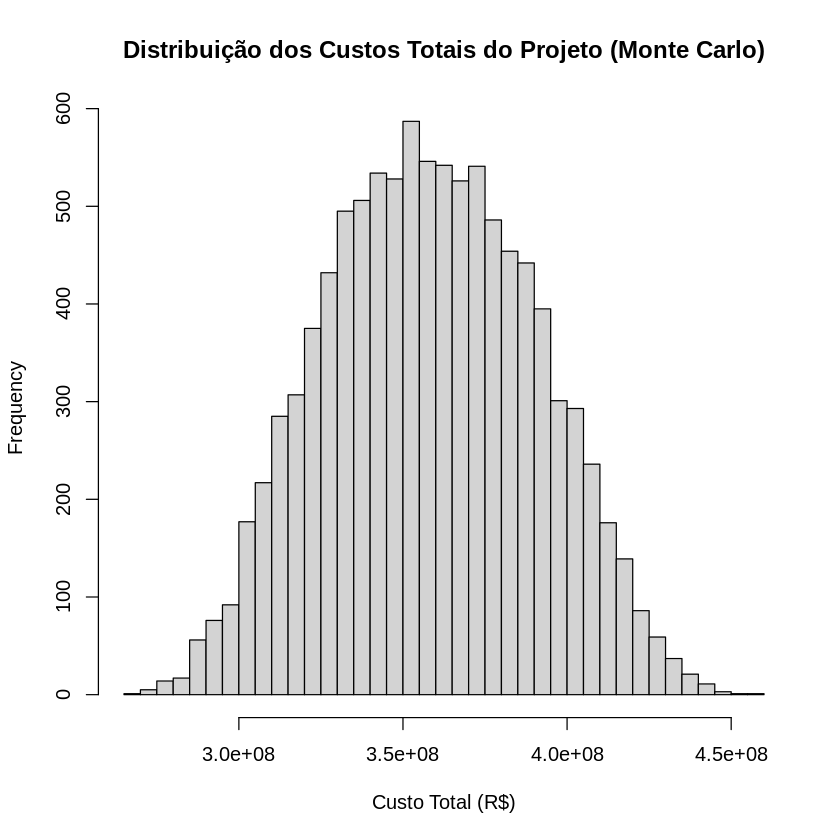

In [52]:
hist(custos_totais_validos, breaks = 50, main = "Distribuição dos Custos Totais do Projeto (Monte Carlo)", xlab = "Custo Total (R$)")

## Análise de risco

In [53]:
risco_custos <- quantile(custos_totais_validos, probs = c(0.05, 0.50, 0.95))
print(risco_custos)

       5%       50%       95% 
306579856 357724526 410983398 
